In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("bank-full.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# finding how mnay discrete and continous feature in ou data sets

discrete_feature = [feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Feature Count: {}'.format(len(discrete_feature)))

continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Discrete Feature Count: 10
Continuous Feature Count 7


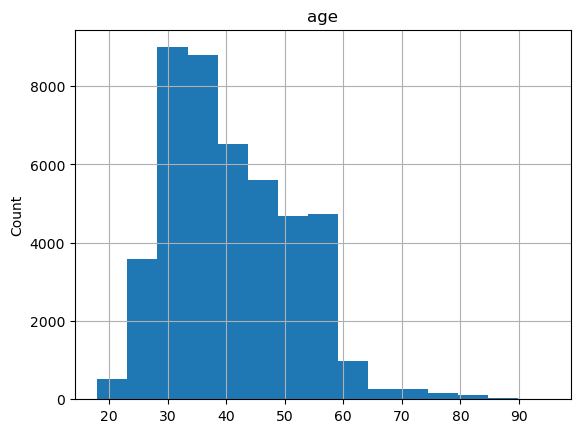

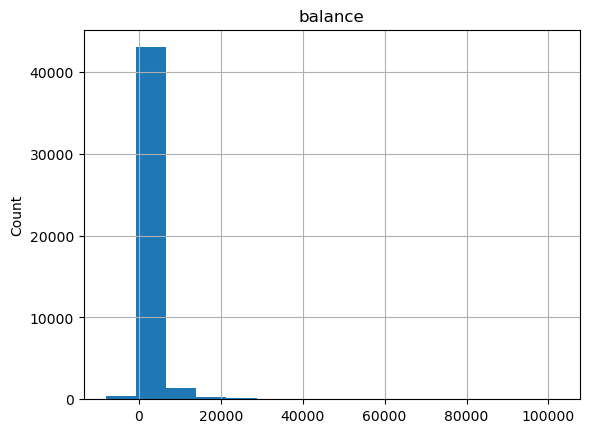

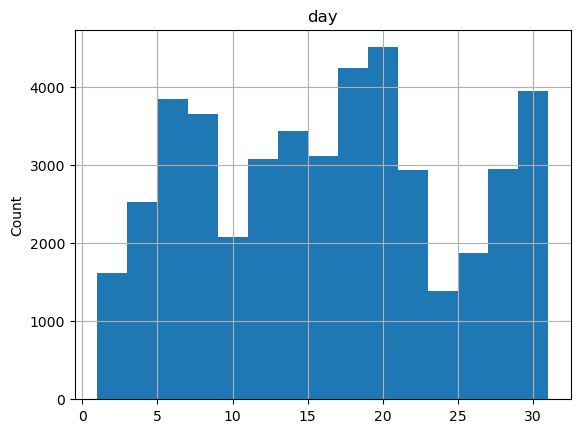

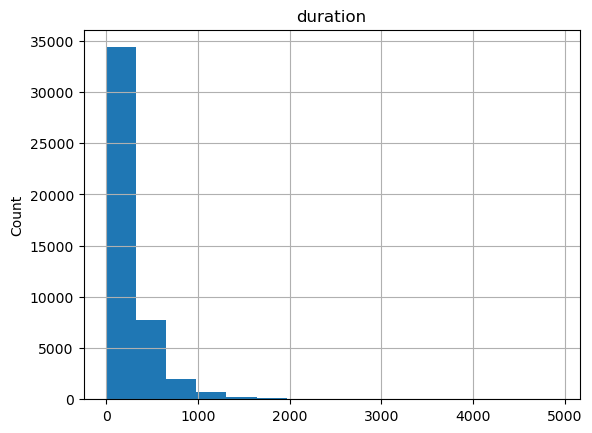

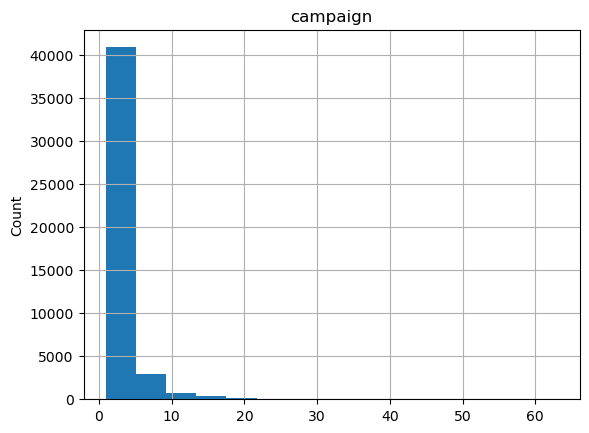

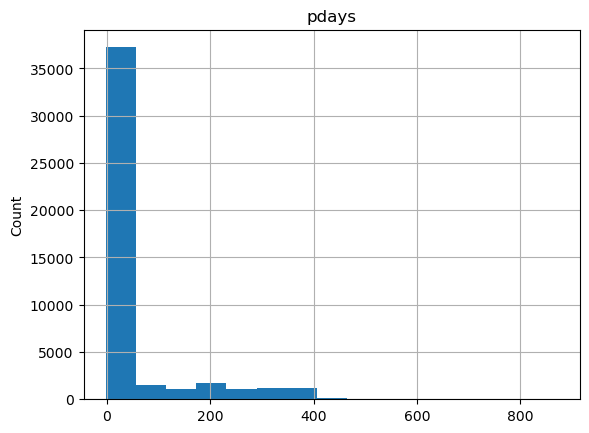

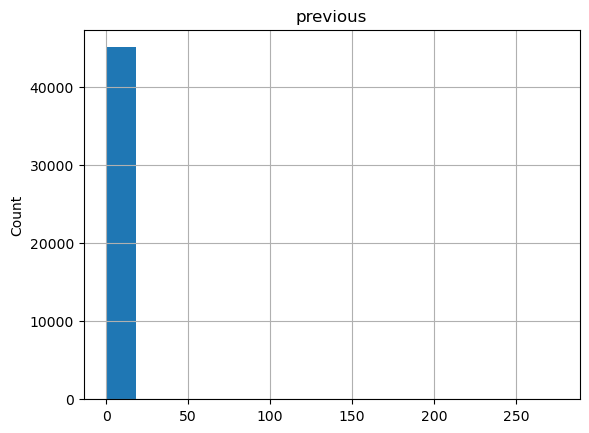

In [17]:
for feature in continuous_feature:
    bank_data1 = data.copy()
    bank_data1[feature].hist(bins=15)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

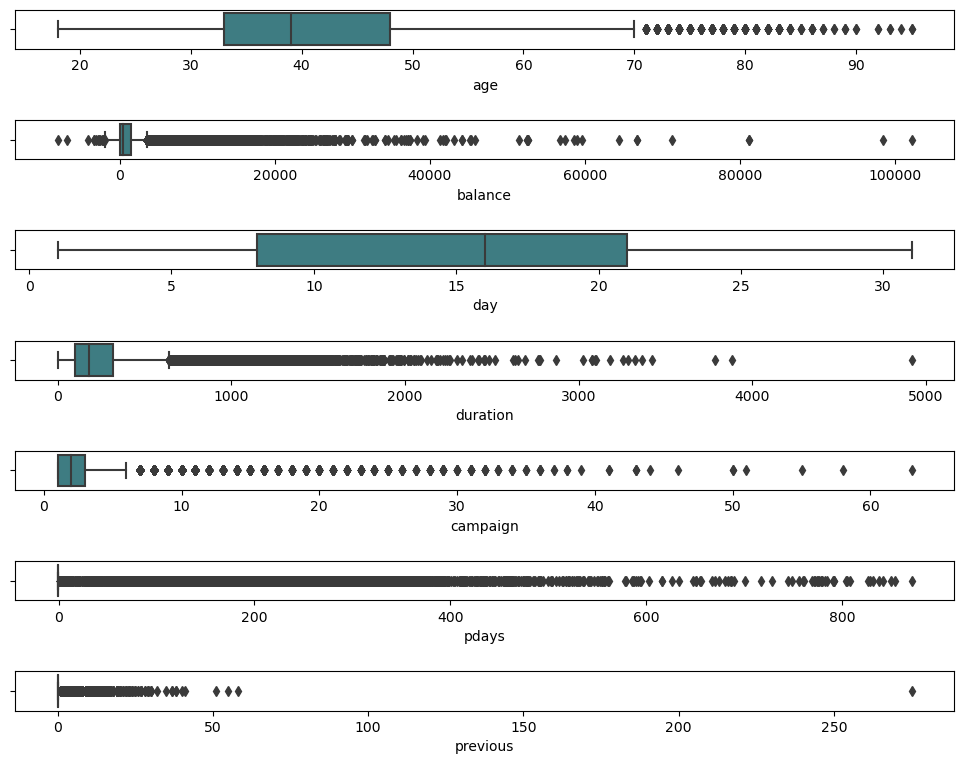

In [18]:
# Outlier detection

outlier = data.copy() 
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [19]:
# Data preprocessing

data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
data1=data

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [22]:
#Label encoding 

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['y'] = data1['y'].cat.codes

In [23]:
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Model Building

In [24]:
x1 = data1.drop('y', axis=1)
y1 = data1[['y']]

In [25]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [26]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# Model Evaluation

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=12)

In [30]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
model.coef_

array([[-2.33773299e-02,  1.53417373e-02, -1.11062372e-01,
        -1.69300723e-02, -5.31385548e-03,  3.33969257e-05,
        -2.17939546e-01, -6.52280669e-02, -2.24673824e-01,
        -1.82294541e-02, -6.64120212e-02,  3.47029299e-03,
        -3.19938168e-01, -9.78272956e-04,  1.31297427e-01,
        -2.12684800e-01]])

In [32]:
model.intercept_

array([-0.0843518])

In [33]:
pred=model.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.57      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [35]:
accuracy_score(y_test,pred)

0.8895278115669578

In [39]:
model.predict([[58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3]])

array([0], dtype=int8)

In [40]:
model.predict_proba([[58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3]])

array([[0.94230842, 0.05769158]])

AUC score : 83.00%


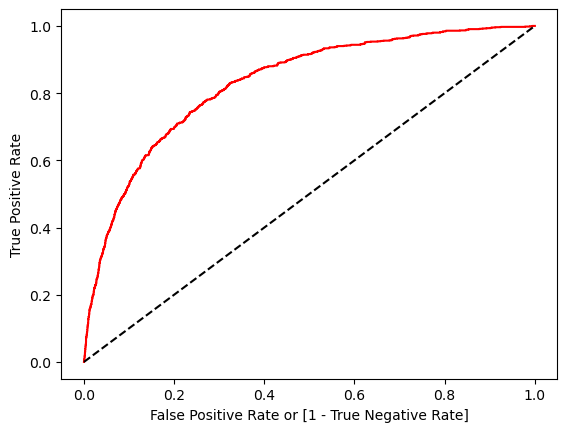

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
#Compare the train-set and test-set accuracy
#Check for overfitting and underfitting (the scores on training and test set)

print('Training set score : {:.2f}%'.format(model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score : 88.70%
Test set score     : 88.95%
